In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]


_Mpc_over_m_ = 3.085677581282e22
_PI_ = 3.1415926535897932384626433832795e0
_c_ = 2.99792458e8 
_G_ = 6.67428e-11
_k_B_ = 1.3806504e-23
_h_P_ = 6.62606896e-34
sigma_B = 2. * np.power(_PI_,5) * np.power(_k_B_,4) / 15. / np.power(_h_P_,3) / np.power(_c_,2)



In [3]:
Gamma_dcdm = 0.1
k_list = '0.0001,0.001,0.01,0.1'
k_list_d = [float(k) for k in k_list.split(',')]



In [4]:
Omega_dm_tot = 0.25
f_dm_decay = 0.01
Gamma_dcdm = 2000.

In [5]:
common_settings_lcdm = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                '100*theta_s':1.04119,
                   'omega_b':0.022032,
                   'Omega_cdm':Omega_dm_tot,
                    #'Gamma_dcdm':0.,
                   'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
    'k_output_values' : k_list,
    'T_cmb': 2.725
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
}

common_settings_dcdm_syn_dr_is_sr = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                    '100*theta_s':1.04119,
                   'omega_b':0.022032,
                   #'Omega_cdm': (1.-f_dm_decay)*Omega_dm_tot,
                   #'Omega_dcdmdr':f_dm_decay*Omega_dm_tot,
                   'Omega_dm_tot': Omega_dm_tot,
                   'f_dm_decay': f_dm_decay,
    
    'Gamma_dcdm':Gamma_dcdm,
                    
                    'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
                    'gauge' : 'synchronous',
                    'dr_is_sr': 1,
    'T_cmb': 2.6,
    'k_output_values' : k_list,
    'perturb_integration_stepsize': 0.5
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
#    'root': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_T0/output/test_dr_sr',
#    'write parameters': 'yes'
}



M_dr_is_sr = Class()
M_dr_is_sr.set(common_settings_dcdm_syn_dr_is_sr)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M_dr_is_sr.compute()


M_lcdm = Class()
M_lcdm.set(common_settings_lcdm)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M_lcdm.compute()


_Mpc_over_m_ = 3.085677581282e22
_PI_ = 3.1415926535897932384626433832795e0
_c_ = 2.99792458e8 
_G_ = 6.67428e-11
_k_B_ = 1.3806504e-23
_h_P_ = 6.62606896e-34
T_cmb = M_dr_is_sr.T_cmb()
h =  M_dr_is_sr.h()
H0_class = h*100*1e3/_c_
rho_crit0_class = H0_class**2
sigma_B = 2. * np.power(_PI_,5) * np.power(_k_B_,4) / 15. / np.power(_h_P_,3) / np.power(_c_,2)
Omega0_g_lcdm = (4.*sigma_B/_c_*np.power(T_cmb,4.)) / (3.*_c_*_c_*1.e10*h*h/_Mpc_over_m_/_Mpc_over_m_/8./_PI_/_G_)

In [6]:
common_settings_dcdm_syn_dr_is_sr = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                    '100*theta_s':1.04119,
                   'omega_b':0.022032,
                   #'Omega_cdm': (1.-f_dm_decay)*Omega_dm_tot,
                   #'Omega_dcdmdr':f_dm_decay*Omega_dm_tot,
                    
                   #'Omega_dm_tot': Omega_dm_tot,
                   #'f_dm_decay': f_dm_decay,
    
    'Omega_cdm':Omega_dm_tot,
    'Gamma_dcdm':Gamma_dcdm,
                    
                    'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
                    'gauge' : 'synchronous',
                    'dr_is_sr': 1,
    'T_cmb': 2.6,
    'k_output_values' : k_list,
    'perturb_integration_stepsize': 0.5
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
#    'root': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_T0/output/test_dr_sr',
#    'write parameters': 'yes'
}

In [35]:
T_cmb_a = np.linspace(1.8,3.,30)

In [60]:
T_cmb_dcdmsr = []
for T_cmb in T_cmb_a :
    M_dr_is_sr = Class()
    common_settings_dcdm_syn_dr_is_sr['T_cmb'] = T_cmb
    common_settings_dcdm_syn_dr_is_sr['f_dm_decay'] = 0.5
    common_settings_dcdm_syn_dr_is_sr['Gamma_dcdm'] = 1000.
    M_dr_is_sr.set(common_settings_dcdm_syn_dr_is_sr)
    # M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
    M_dr_is_sr.compute()
    T_cmb_dcdmsr.append(M_dr_is_sr.T_cmb_dcdmsr())

CosmoComputationError: 

Error in Class: background_init(L:702) :condition (pba->shooting_failed == _TRUE_) is true; Shooting failed, try optimising input_get_guess(). Error message:

input_init(L:422) :error in fzero_Newton(input_try_unknown_parameters, x_inout, dxdF, unknown_parameters_size, 1e-4, 1e-6, &fzw, &fevals, errmsg);
=>fzero_Newton(L:1114) :error in func(x_inout, x_size, param, F0, error_message);
=>input_try_unknown_parameters(L:3812) :error in background_init(&pr,&ba);
=>background_init(L:747) :error in background_solve(ppr,pba);
=>background_solve(L:1740) :error in generic_integrator(background_derivs, tau_start, tau_end, pvecback_integration, &bpaw, ppr->tol_background_integration, ppr->smallest_allowed_variation, &gi);
=>generic_integrator(L:103) :error in rkqs(&x, h, eps, &hdid, &hnext, derivs, parameters_and_workspace_for_derivs, pgi);
=>rkqs(L:144) :error in rkck(*x,h,derivs,parameters_and_workspace_for_derivs,pgi);
=>rkck(L:200) :error in (*derivs)(x+0.6*h, pgi->ytemp, pgi->ak4, parameters_and_workspace_for_derivs, pgi->error_message);
=>background_derivs(L:2419) :error in background_functions(pba, y, pba->normal_info, pvecback);
=>background_functions(L:483) :condition (rho_crit <= 0.) is true; rho_crit = -1.329401e+04 instead of strictly positive

In [57]:
T_cmb_a

array([1.8       , 1.84137931, 1.88275862, 1.92413793, 1.96551724,
       2.00689655, 2.04827586, 2.08965517, 2.13103448, 2.17241379,
       2.2137931 , 2.25517241, 2.29655172, 2.33793103, 2.37931034,
       2.42068966, 2.46206897, 2.50344828, 2.54482759, 2.5862069 ,
       2.62758621, 2.66896552, 2.71034483, 2.75172414, 2.79310345,
       2.83448276, 2.87586207, 2.91724138, 2.95862069, 3.        ])

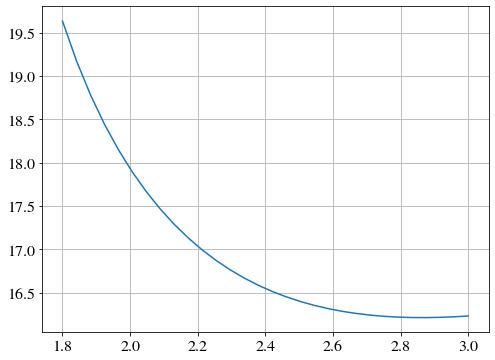

In [58]:
plt.plot(T_cmb_a,T_cmb_dcdmsr)
plt.grid()

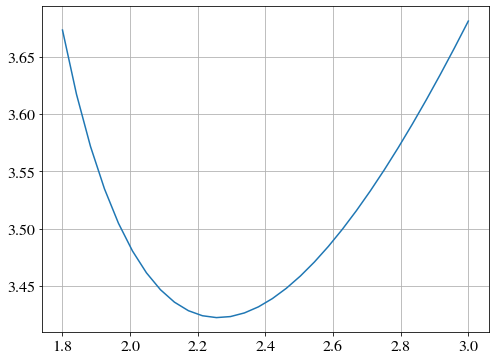

In [38]:
plt.plot(T_cmb_a,T_cmb_dcdmsr)
plt.grid()

In [6]:
f_dm_decay*Omega_dm_tot

0.0125

In [24]:
Omega_ini_dcdm = 0.000105

In [25]:
Omega_dm_tot = 0.25
f_dm_decay = 0.001
Gamma_dcdm = 2000.

common_settings_dcdm_syn_dr_is_sr = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                    '100*theta_s':1.04119,
                   'omega_b':0.022032,
                  'Omega_cdm': 0.25,#(1.-f_dm_decay)*Omega_dm_tot,
                   #'Omega_dcdmdr':f_dm_decay*Omega_dm_tot,
                  # 'Omega_dm_tot': Omega_dm_tot,
                  # 'f_dm_decay': f_dm_decay,
                   
                    'Omega_ini_dcdm': Omega_ini_dcdm,
                    'Gamma_dcdm':Gamma_dcdm,
                    
                    'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
                    'gauge' : 'synchronous',
                    'dr_is_sr': 1,
    'T_cmb': 2.6,
    #'k_output_values' : k_list,
    'perturb_integration_stepsize': 0.5
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
#    'root': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_T0/output/test_dr_sr',
#    'write parameters': 'yes'
}

M_dr_is_sr = Class()
M_dr_is_sr.set(common_settings_dcdm_syn_dr_is_sr)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M_dr_is_sr.compute()



In [26]:
M_dr_is_sr.Omega0_m()

0.296392896034656

In [125]:
l = Gamma_dcdm/M_dr_is_sr.Omega0_m()**0.5/M_dr_is_sr.h()/100.
l

53.30830587780104

In [127]:
M_dr_is_sr.h()

0.6891301

In [84]:
z=1e10
gammainc(5./3.,0.)

0.0

In [81]:
gamma(5./3.)

0.9027452929509338

In [86]:

def fz(l,z):
        #return 1.-(1.+1.18293*b_over_a*ftcmb(l))**0.25
        return (1.+b_over_a*(2.*l/3.)**(-2./3.)*(gamma(5./3.)-(gamma(5./3.)-gamma(5./3.)*gammainc(5./3.,2./3.*l/(1.+z)**(3./2.)))))
fz = np.vectorize(fz)

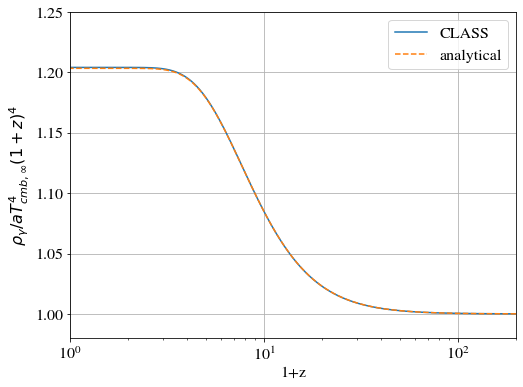

In [90]:
z = M_dr_is_sr.get_background()['z']
rho_g = M_dr_is_sr.get_background()['(.)rho_g']/rho_g_lcdm
plt.plot(1+z,rho_g,label='CLASS')
plt.plot(1+z,fz(l,z),ls='--',label='analytical')
plt.xscale('log')
plt.xlim(1,200)
plt.ylim(0.98,1.25)
plt.xlabel('1+z')
plt.ylabel(r'$\rho_\gamma/aT_{cmb,\infty}^4(1+z)^4$')
plt.legend()
plt.grid()

Text(0, 0.5, '$T_{cmb}(z)$')

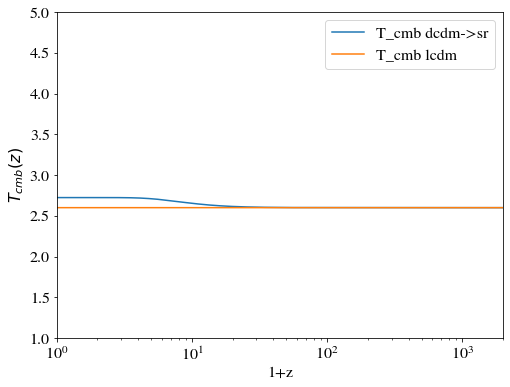

In [27]:
z = M_dr_is_sr.get_background()['z']
rho_g = M_dr_is_sr.get_background()['(.)rho_g']
T_cmb = M_dr_is_sr.T_cmb()


h = M_dr_is_sr.h()
H0_class = h*100*1e3/_c_
rho_crit0_class = H0_class**2

Omega0_g_lcdm = (4.*sigma_B/_c_*np.power(T_cmb,4.)) / (3.*_c_*_c_*1.e10*h*h/_Mpc_over_m_/_Mpc_over_m_/8./_PI_/_G_)
rho_g_lcdm = Omega0_g_lcdm*(1.+z)**4.*rho_crit0_class
T_cmb_eff = M_dr_is_sr.T_cmb()*(rho_g/rho_g_lcdm)**0.25
plt.plot(1+z,T_cmb_eff*(1.+z)**0,
           label='T_cmb dcdm->sr')
plt.plot(1+z,T_cmb*(1.+z)**0,
           label='T_cmb lcdm')
plt.xscale('log')
plt.yscale('linear')
plt.xlim(1e0,2e3)
plt.ylim(1e0,5)
plt.legend()
plt.xlabel('1+z')
plt.ylabel(r'$T_{cmb}(z)$')

Text(0, 0.5, '$\\Delta T_{cmb}/T_{cmb}(z)$')

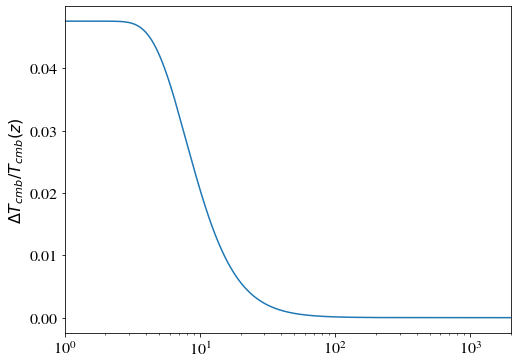

In [57]:
plt.plot(1+z,-(T_cmb-T_cmb_eff)/T_cmb,
           label='T_cmb dcdm->sr')
plt.xlim(1e0,2e3)
plt.xscale('log')
plt.yscale('linear')
plt.ylabel(r'$\Delta T_{cmb}/T_{cmb}(z)$')

In [99]:
-(T_cmb-T_cmb_eff)/T_cmb

array([-0.00000000e+00, -0.00000000e+00, -1.70803542e-16, ...,
        4.75272922e-02,  4.75272922e-02,  4.75273780e-02])

In [28]:
Omega0_g_lcdm = (4.*sigma_B/_c_*np.power(T_cmb,4.)) / (3.*_c_*_c_*1.e10*h*h/_Mpc_over_m_/_Mpc_over_m_/8./_PI_/_G_)

#a = Omega0_g_lcdm

In [54]:
from scipy.special import gammainc 
from scipy.special import gamma

In [56]:
gamma

<ufunc 'gamma'>

In [55]:
gamma(5./3.)

0.9027452929509338

In [107]:
b_over_a = Omega_ini_dcdm/Omega0_g_lcdm
b_over_a

2.4347961927531707

In [119]:
def ftcmb(l):
    return (1.-1.1077)*l**(-2./3.)*gammainc(5./3.,2./3.*l)
ftcmb = np.vectorize(ftcmb)

def dT_T(l,b_over_a):
        #return 1.-(1.+1.18293*b_over_a*ftcmb(l))**0.25
        return (1.+b_over_a*(2.*l/3.)**(-2./3.)*(gamma(5./3.)-(gamma(5./3.)-gamma(5./3.)*gammainc(5./3.,2./3.*l/(1.+0.)**(3./2.)))))**0.25-1.
dT_T = np.vectorize(dT_T)


def dT_T_taylor(l,b_over_a):
        #return 1.-(1.+1.18293*b_over_a*ftcmb(l))**0.25
        return 0.25*(b_over_a*(2.*l/3.)**(-2./3.)*(gamma(5./3.)-(gamma(5./3.)-gamma(5./3.)*gammainc(5./3.,2./3.*l/(1.+0.)**(3./2.)))))
dT_T_taylor = np.vectorize(dT_T_taylor)



In [120]:
l = np.geomspace(1e-2,1e4,100)
a_ftcmb = ftcmb(l) 
a_dT_T = dT_T(l,2.43) 
b_dT_T = dT_T(l,0.243) 
c_dT_T = dT_T(l,24.3) 

a_dT_T_taylor = dT_T_taylor(l,2.43) 
b_dT_T_taylor = dT_T_taylor(l,0.243) 
c_dT_T_taylor = dT_T_taylor(l,24.3) 

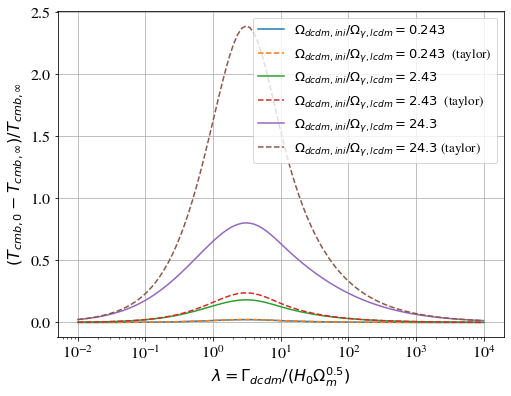

In [124]:

plt.plot(l,b_dT_T,label=r'$\Omega_{dcdm,ini}/\Omega_{\gamma,lcdm}=0.243$')
plt.plot(l,b_dT_T_taylor,ls='--',label=r'$\Omega_{dcdm,ini}/\Omega_{\gamma,lcdm}=0.243$  (taylor)')
plt.plot(l,a_dT_T,label=r'$\Omega_{dcdm,ini}/\Omega_{\gamma,lcdm}=2.43$')
plt.plot(l,a_dT_T_taylor,ls='--',label=r'$\Omega_{dcdm,ini}/\Omega_{\gamma,lcdm}=2.43$  (taylor)')
plt.plot(l,c_dT_T,label=r'$\Omega_{dcdm,ini}/\Omega_{\gamma,lcdm}=24.3$')
plt.plot(l,c_dT_T_taylor,ls='--',label=r'$\Omega_{dcdm,ini}/\Omega_{\gamma,lcdm}=24.3$ (taylor)')
plt.xscale('log')
plt.xlabel(r'$\lambda=\Gamma_{dcdm}/(H_0\Omega_m^{0.5})$')
plt.ylabel(r'$(T_{cmb,0}-T_{cmb,\infty})/T_{cmb,\infty}$')
plt.grid()
plt.legend(fontsize=13)

In [131]:
l0 = Gamma_dcdm/M_dr_is_sr.Omega0_m()**0.5/M_dr_is_sr.h()/100.
l0
dT_T(l0,b_over_a)

array(0.04736293)

In [132]:
dT_T_taylor(l0,b_over_a)

array(0.05083531)

In [62]:
l = Gamma_dcdm/M_dr_is_sr.Omega0_m()**0.5/M_dr_is_sr.h()/100.
l

53.30830587780104

In [6]:
M_dr_is_sr.T_cmb_dcdmsr()

2.723571182729541

In [3]:
common_settings_lcdm = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                '100*theta_s':1.04119,
                   'omega_b':0.022032,
                   'Omega_cdm':0.25,
                    #'Gamma_dcdm':0.,
                   'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
    #'k_output_values' : k_list,
    'T_cmb': 2.725
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
}

M_lcdm = Class()
M_lcdm.set(common_settings_lcdm)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M_lcdm.compute()

In [7]:

cls = M_dr_is_sr.raw_cl(2500)
cls_lcdm = M_lcdm.raw_cl(2500)

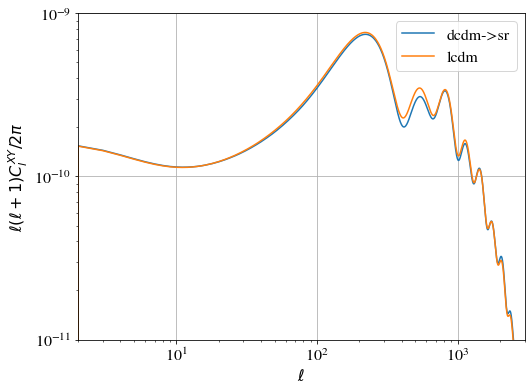

In [8]:
l = cls['ell']
plt.plot(cls['ell'],l*(l+1.)/2./np.pi*cls['tt'],label='dcdm->sr')
l = cls_lcdm['ell']
plt.plot(cls_lcdm['ell'],l*(l+1.)/2./np.pi*cls_lcdm['tt'],label='lcdm')
plt.loglog()
plt.legend()
plt.xlim([2,3000])
plt.ylim([1.e-11,1e-9])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi $")

plt.grid()

In [17]:
M_dr_is_sr.Omega_Lambda()

0.7209980846229376

In [12]:
M_lcdm.struct_cleanup()
M_lcdm.empty()

M_dr_is_sr.struct_cleanup()
M_dr_is_sr.empty()

In [10]:
M_dr_is_sr.h()

0.762954

In [11]:
M_lcdm.h()

0.6842609

In [10]:
M_dr_is_sr.T_cmb()

2.6

In [13]:
T_cmb_eff

array([2.2       , 2.2       , 2.2       , ..., 2.6011925 , 2.60536971,
       2.60820345])

In [6]:

Omega_dm_tot = 0.25
f_dm_decay = 0.01
Gamma_dcdm = 2000.

common_settings_dcdm_syn = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                    '100*theta_s':1.04119,
                   'omega_b':0.022032,
                   'Omega_dm_tot': Omega_dm_tot,
                   'f_dm_decay': f_dm_decay,
                    'Gamma_dcdm':Gamma_dcdm,
                    'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
                    'gauge' : 'synchronous',
    'k_output_values' : k_list
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
#    'root': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_T0/output/test_dr_sr',
#    'write parameters': 'yes'
}

common_settings_dcdm_new = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                   '100*theta_s':1.04119,
                   'omega_b':0.022032,
                   'Omega_dm_tot': Omega_dm_tot,
                   'f_dm_decay': f_dm_decay,
                    'Gamma_dcdm':Gamma_dcdm,
#                    'A_s':2.215e-9,
                    'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
                    'gauge' : 'new',
    'k_output_values' : k_list,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246}
                   # other output and precision parameters
                   #'l_max_scalars':3000}


common_settings_dcdm_syn_dr_is_sr = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                    '100*theta_s':1.04119,
                   'omega_b':0.022032,
                   'Omega_dm_tot': Omega_dm_tot,
                   'f_dm_decay': f_dm_decay,
                    'Gamma_dcdm':Gamma_dcdm,
                    'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
                    'gauge' : 'synchronous',
                    'dr_is_sr': 1,
    'k_output_values' : k_list,
    'perturb_integration_stepsize': 0.5
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
#    'root': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_T0/output/test_dr_sr',
#    'write parameters': 'yes'
}


common_settings_dcdm_syn_dr_is_sr_test = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                    '100*theta_s':1.04119,
                   'omega_b':0.022032,
                   'Omega_dm_tot': Omega_dm_tot,
                   'f_dm_decay': f_dm_decay,
                    'Gamma_dcdm':Gamma_dcdm,
                    'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
                    'gauge' : 'synchronous',
                    'dr_is_sr': 1,
    'k_output_values' : k_list,
    'perturb_integration_stepsize': 0.05, # default 0.5
    'perturb_sampling_stepsize': 0.01, #default 0.1
    'tol_perturb_integration': 1e-6,#default 1e-5
    'tight_coupling_trigger_tau_c_over_tau_k': 0.001 # default 0.01
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
#    'root': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_T0/output/test_dr_sr',
#    'write parameters': 'yes'
}


common_settings_dcdm_new_dr_is_sr = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                    '100*theta_s':1.04119,
                   'omega_b':0.022032,
                   'Omega_dm_tot': Omega_dm_tot,
                   'f_dm_decay': f_dm_decay,
                    'Gamma_dcdm':Gamma_dcdm,
                    'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
                    'gauge' : 'newtonian',
                    'dr_is_sr': 1,
    'k_output_values' : k_list,
    #'perturb_integration_stepsize': 0.05
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
#    'root': '/Users/boris/Work/CLASS-SZ/SO-SZ/class_T0/output/test_dr_sr',
#    'write parameters': 'yes'
}


common_settings_lcdm = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,mTk,vTk',
                   # LambdaCDM parameters
                '100*theta_s':1.04119,
                   'omega_b':0.022032,
 'Omega_cdm':Omega_dm_tot,
                    #'Gamma_dcdm':0.,
                   'ln10^{10}A_s' : 3.0980,
                   'tau_reio':0.0925,
    'k_output_values' : k_list
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
#                   'YHe':0.246
}

In [7]:
M_lcdm = Class()
M_lcdm.set(common_settings_lcdm)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M_lcdm.compute()



M_dr = Class()
M_dr.set(common_settings_dcdm_syn)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M_dr.compute()


M_dr_is_sr = Class()
M_dr_is_sr.set(common_settings_dcdm_syn_dr_is_sr)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M_dr_is_sr.compute()

M_dr_is_sr_test = Class()
M_dr_is_sr_test.set(common_settings_dcdm_syn_dr_is_sr_test)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M_dr_is_sr_test.compute()


M_dr_is_sr_new = Class()
M_dr_is_sr_new.set(common_settings_dcdm_new_dr_is_sr)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M_dr_is_sr_new.compute()

0, 0: 100*theta_s 1.041e+00
pba->Omega0_dcdmdr = 0.00000000e+00
pba->Omega0_cdm = 2.50000000e-01
pba->Omega0_dcdmdr = 0.00000000e+00
pba->Omega0_cdm = 2.50000000e-01
Omega_dcdm = 1.803e+07 Omega_dr = 1.803e+07
omega_dcdmdr = 1.79751036e+07
T_cmb_dcdmsr = 3.98935209e-312
pba->Omega0_dcdmdr = 0.00000000e+00
pba->Omega0_cdm = 2.50000000e-01
Omega_dcdm = 2.035e+07 Omega_dr = 2.035e+07
omega_dcdmdr = 1.79751036e+07
T_cmb_dcdmsr = 3.98935209e-312
pba->Omega0_dcdmdr = 0.00000000e+00
pba->Omega0_cdm = 2.50000000e-01
Omega_dcdm = 5.267e-05 Omega_dr = 1.914e+07
omega_dcdmdr = 8.98755179e+06
T_cmb_dcdmsr = 0.00000000e+00
pba->Omega0_dcdmdr = 0.00000000e+00
pba->Omega0_cdm = 2.50000000e-01
Omega_dcdm = 5.282e-05 Omega_dr = 1.920e+07
omega_dcdmdr = 8.98755179e+06
T_cmb_dcdmsr = 0.00000000e+00
pba->Omega0_dcdmdr = 0.00000000e+00
pba->Omega0_cdm = 2.50000000e-01
Omega_dcdm = 5.437e-05 Omega_dr = 1.976e+07
omega_dcdmdr = 8.98755179e+06
T_cmb_dcdmsr = 0.00000000e+00
pba->Omega0_dcdmdr = 0.00000000e+00


In [6]:
_Mpc_over_m_ = 3.085677581282e22
_PI_ = 3.1415926535897932384626433832795e0
_c_ = 2.99792458e8 
_G_ = 6.67428e-11
_k_B_ = 1.3806504e-23
_h_P_ = 6.62606896e-34
T_cmb = M_lcdm.T_cmb()
h = M_lcdm.h()
H0_class = h*100*1e3/_c_
rho_crit0_class = H0_class**2
sigma_B = 2. * np.power(_PI_,5) * np.power(_k_B_,4) / 15. / np.power(_h_P_,3) / np.power(_c_,2)
Omega0_g_lcdm = (4.*sigma_B/_c_*np.power(T_cmb,4.)) / (3.*_c_*_c_*1.e10*h*h/_Mpc_over_m_/_Mpc_over_m_/8./_PI_/_G_)

In [10]:
M_dr_is_sr.get_background()['z']

array([1.00000000e+14, 9.93048659e+13, 9.86145640e+13, ...,
       1.36916594e-02, 6.60715603e-03, 0.00000000e+00])

Text(0, 0.5, '$\\Omega(z)$')

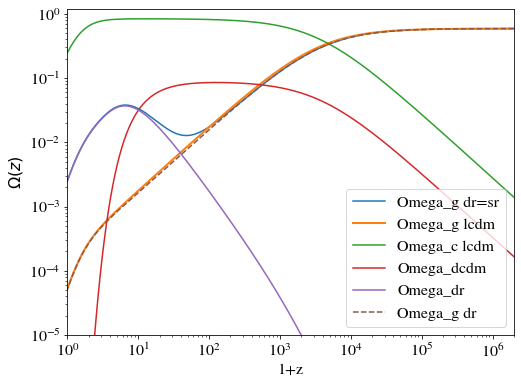

In [12]:
plt.loglog(1.+M_dr_is_sr.get_background()['z'],M_dr_is_sr.get_background()['(.)rho_g']/M_dr_is_sr.get_background()['(.)rho_crit'],
           label='Omega_g dr=sr')


plt.loglog(1.+M_lcdm.get_background()['z'],M_lcdm.get_background()['(.)rho_g']/M_lcdm.get_background()['(.)rho_crit'],label='Omega_g lcdm',lw=2)
plt.loglog(1.+M_lcdm.get_background()['z'],M_lcdm.get_background()['(.)rho_cdm']/M_lcdm.get_background()['(.)rho_crit'],label='Omega_c lcdm')



# plt.loglog(1.+M_lcdm.get_background()['z'],Omega0_g_lcdm*(1.+M_lcdm.get_background()['z']))

plt.loglog(1.+M_dr.get_background()['z'],M_dr.get_background()['(.)rho_dcdm']/M_dr.get_background()['(.)rho_crit'],label='Omega_dcdm')
plt.loglog(1.+M_dr.get_background()['z'],M_dr.get_background()['(.)rho_dr']/M_dr.get_background()['(.)rho_crit'],label='Omega_dr')
plt.loglog(1.+M_dr.get_background()['z'],M_dr.get_background()['(.)rho_g']/M_dr.get_background()['(.)rho_crit'],ls='--',label='Omega_g dr')


plt.legend(loc=4)
plt.xlim(1e0,2.e6)
plt.ylim(1e-5,1.2)
plt.xlabel('1+z')
plt.ylabel(r'$\Omega(z)$')

In [18]:
Om_dr = (M_dr.get_background()['(.)rho_dr']/M_dr.get_background()['(.)rho_crit'])[-1]
Om_dcdm = (M_dr.get_background()['(.)rho_dcdm']/M_dr.get_background()['(.)rho_crit'])[-1]
Om_cdm = (M_dr.get_background()['(.)rho_cdm']/M_dr.get_background()['(.)rho_crit'])[-1]
Om_dcdm+Om_dr

0.002500252107575085

In [21]:
Om_dr = (M_dr_is_sr.get_background()['(.)rho_dr']/M_dr_is_sr.get_background()['(.)rho_crit'])[-1]
Om_dcdm = (M_dr_is_sr.get_background()['(.)rho_dcdm']/M_dr_is_sr.get_background()['(.)rho_crit'])[-1]
Om_cdm = (M_dr_is_sr.get_background()['(.)rho_cdm']/M_dr_is_sr.get_background()['(.)rho_crit'])[-1]
Om_dcdm+Om_dr

0.0025002513397718285

In [22]:
Om_cdm

0.24749993763750025

In [20]:
Om_dr

0.0025002521075515767

Text(0, 0.5, '(.)$\\rho_g(z)$')

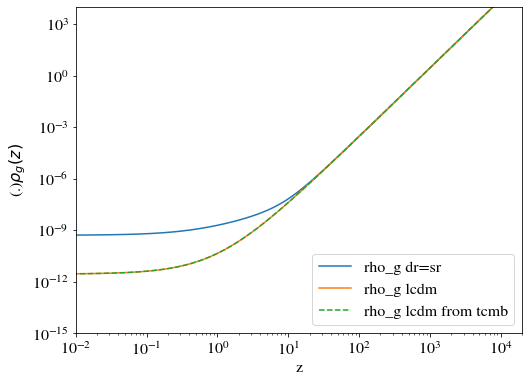

In [9]:
z = M_dr_is_sr.get_background()['z']
rho_g = M_dr_is_sr.get_background()['(.)rho_g']
plt.loglog(z,rho_g,
           label='rho_g dr=sr')

z = M_lcdm.get_background()['z']
rho_g_lcdm = M_lcdm.get_background()['(.)rho_g']
plt.loglog(z,rho_g_lcdm,
           label='rho_g lcdm')

rho_g_lcdm = Omega0_g_lcdm*(1.+z)**4.*rho_crit0_class
plt.loglog(z,rho_g_lcdm,
           ls = '--',
           label='rho_g lcdm from tcmb')




plt.legend(loc=4)
plt.xlim(1e-2,2e4)
plt.ylim(1e-15,1e4)
plt.xlabel('z')
plt.ylabel(r'(.)$\rho_g(z)$')

Text(0, 0.5, '$T_{cmb}(z)$')

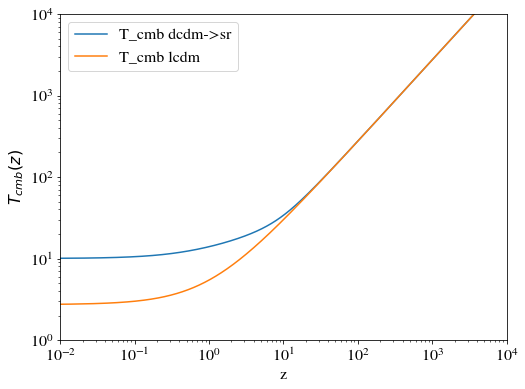

In [10]:
z = M_dr_is_sr.get_background()['z']
rho_g = M_dr_is_sr.get_background()['(.)rho_g']
rho_g_lcdm = Omega0_g_lcdm*(1.+z)**4.*rho_crit0_class
T_cmb_eff = T_cmb*(rho_g/rho_g_lcdm)**0.25
plt.plot(z,T_cmb_eff*(1.+z),
           label='T_cmb dcdm->sr')
plt.plot(z,T_cmb*(1.+z),
           label='T_cmb lcdm')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-2,1e4)
plt.ylim(1e0,1e4)
plt.legend()
plt.xlabel('z')
plt.ylabel(r'$T_{cmb}(z)$')

In [248]:
T_cmb_eff

array([ 2.7255    ,  2.7255    ,  2.7255    , ...,  9.96389165,
        9.99606626, 10.02661518])

In [ ]:
#   /** - compute expansion rate H from Friedmann equation: this is the
#       only place where the Friedmann equation is assumed. Remember
#       that densities are all expressed in units of \f$ [3c^2/8\pi G] \f$, ie
#       \f$ \rho_{class} = [8 \pi G \rho_{physical} / 3 c^2]\f$ */

In [130]:
M_dr.get_transfer().keys()

dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_ur', 'd_dcdm', 'd_dr', 'd_tot', 'phi', 'psi', 't_g', 't_b', 't_ur', 't_dcdm', 't_dr', 't_tot'])

Text(0, 0.5, '$\\delta_g^2$')

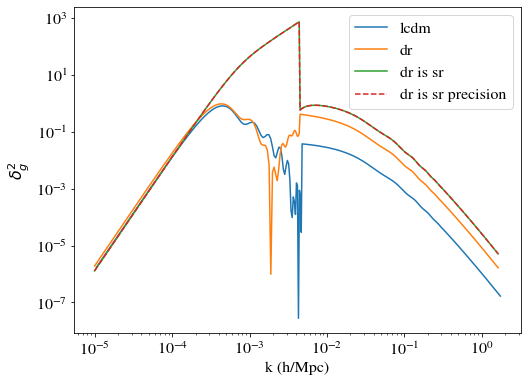

In [131]:
plt.plot(M_lcdm.get_transfer()['k (h/Mpc)'],M_lcdm.get_transfer()['d_g']**2.,label='lcdm')
plt.plot(M_dr.get_transfer()['k (h/Mpc)'],M_dr.get_transfer()['d_g']**2.,label='dr')
plt.plot(M_dr_is_sr.get_transfer()['k (h/Mpc)'],M_dr_is_sr.get_transfer()['d_g']**2.,label='dr is sr')
plt.plot(M_dr_is_sr_test.get_transfer()['k (h/Mpc)'],M_dr_is_sr_test.get_transfer()['d_g']**2.,ls='--',label='dr is sr precision')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('k (h/Mpc)')
plt.ylabel(r'$\delta_g^2$')

In [132]:
M_lcdm.get_transfer().keys()

dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_ur', 'd_tot', 'phi', 'psi', 't_g', 't_b', 't_ur', 't_tot'])

Text(0, 0.5, '$\\theta_g^2$')

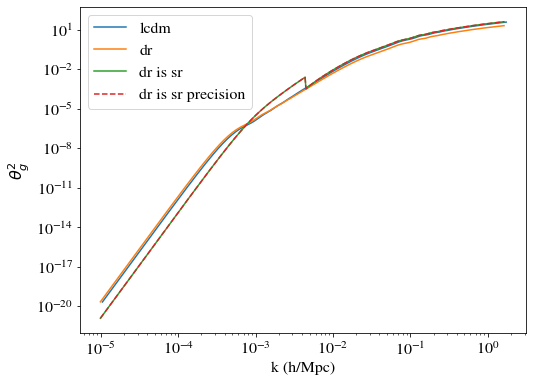

In [133]:
plt.plot(M_lcdm.get_transfer()['k (h/Mpc)'],M_lcdm.get_transfer()['t_g']**2.,label='lcdm')
plt.plot(M_dr.get_transfer()['k (h/Mpc)'],M_dr.get_transfer()['t_g']**2.,label='dr')
plt.plot(M_dr_is_sr.get_transfer()['k (h/Mpc)'],M_dr_is_sr.get_transfer()['t_g']**2.,label='dr is sr')
plt.plot(M_dr_is_sr_test.get_transfer()['k (h/Mpc)'],M_dr_is_sr_test.get_transfer()['t_g']**2.,ls='--',label='dr is sr precision')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('k (h/Mpc)')
plt.ylabel(r'$\theta_g^2$')

Text(0, 0.5, '$\\theta_g^2$')

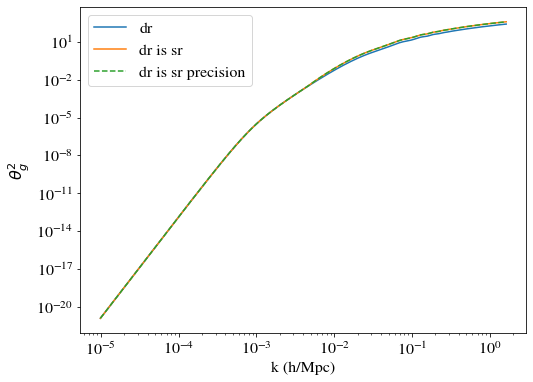

In [144]:
plt.plot(M_dr.get_transfer()['k (h/Mpc)'],M_dr.get_transfer()['t_dr']**2.,label='dr')
plt.plot(M_dr_is_sr.get_transfer()['k (h/Mpc)'],M_dr_is_sr.get_transfer()['t_dr']**2.,label='dr is sr')
plt.plot(M_dr_is_sr_test.get_transfer()['k (h/Mpc)'],M_dr_is_sr_test.get_transfer()['t_dr']**2.,ls='--',label='dr is sr precision')
plt.ylim
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('k (h/Mpc)')
plt.ylabel(r'$\theta_g^2$')


In [47]:
M_dr.get_perturbations()['scalar'][0].keys()

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm', 'delta_dcdm', 'theta_dcdm', 'delta_dr', 'theta_dr', 'shear_dr'])

Text(0.5, 1.0, 'k=1.000e-02 h/Mpc')

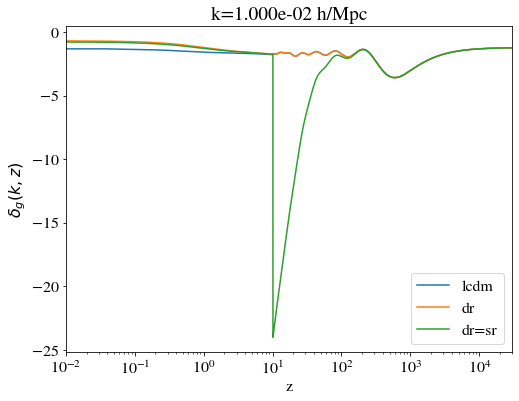

In [143]:
i = 2
k = k_list_d[i]

z = 1./M_lcdm.get_perturbations()['scalar'][i]['a']-1.
delta_g = M_lcdm.get_perturbations()['scalar'][i]['delta_g']
plt.plot(z,delta_g,label='lcdm')


z = 1./M_dr.get_perturbations()['scalar'][i]['a']-1.
delta_g = M_dr.get_perturbations()['scalar'][i]['delta_g']
plt.plot(z,delta_g,label='dr')


z = 1./M_dr_is_sr.get_perturbations()['scalar'][i]['a']-1.
delta_g = M_dr_is_sr.get_perturbations()['scalar'][i]['delta_g']
plt.plot(z,delta_g,label='dr=sr')


plt.xlim(1.e-2,30000)
plt.xscale('log')
plt.legend(loc=4)
plt.xlabel('z')
plt.ylabel(r'$\delta_g (k,z)$')
plt.title('k=%.3e h/Mpc'%k)

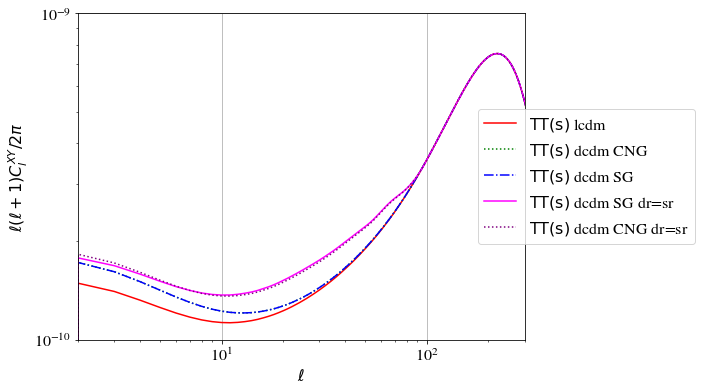

In [28]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#



                   # other output and precision parameters
                   #'l_max_scalars':3000}
###############
#    
# call CLASS 
#
###############
#
# scalars only
#
M = Class()
M.set(common_settings_dcdm_new)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M.compute()
cls_dcdm_new = M.raw_cl(2500)
M.struct_cleanup()
M.empty()

M = Class()
M.set(common_settings_dcdm_syn)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M.compute()
cls_dcdm_syn = M.raw_cl(2500)
M.struct_cleanup()
M.empty()


M = Class()
M.set(common_settings_dcdm_syn_dr_is_sr)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M.compute()
cls_dcdm_syn_dr_is_sr = M.raw_cl(2500)
M.struct_cleanup()
M.empty()



M = Class()
M.set(common_settings_dcdm_new_dr_is_sr)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M.compute()
cls_dcdm_new_dr_is_sr = M.raw_cl(2500)
M.struct_cleanup()
M.empty()




M = Class()
M.set(common_settings_lcdm)
# M.set({'output':'tCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M.compute()
cls_lcdm = M.raw_cl(2500)
M.struct_cleanup()
M.empty()

#################
#
# start plotting
#
#################
#
plt.xlim([2,300])
plt.ylim([1.e-10,1e-9])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi $")

plt.grid()
#
ell = cls_lcdm['ell']

factor = ell*(ell+1.)/2./math.pi

#
plt.loglog(ell,factor*cls_lcdm['tt'],'r-',label=r'$\mathrm{TT(s)}$ lcdm')
plt.loglog(ell,factor*cls_dcdm_new['tt'],'g:',label=r'$\mathrm{TT(s)}$ dcdm CNG')
plt.loglog(ell,factor*cls_dcdm_syn['tt'],'b-.',label=r'$\mathrm{TT(s)}$ dcdm SG')
plt.loglog(ell,factor*cls_dcdm_syn_dr_is_sr['tt'],'magenta',label=r'$\mathrm{TT(s)}$ dcdm SG dr=sr')
plt.loglog(ell,factor*cls_dcdm_new_dr_is_sr['tt'],c='purple',ls=':',label=r'$\mathrm{TT(s)}$ dcdm CNG dr=sr')

plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

In [ ]:
plt.savefig('cl_ST.pdf',bbox_inches='tight')

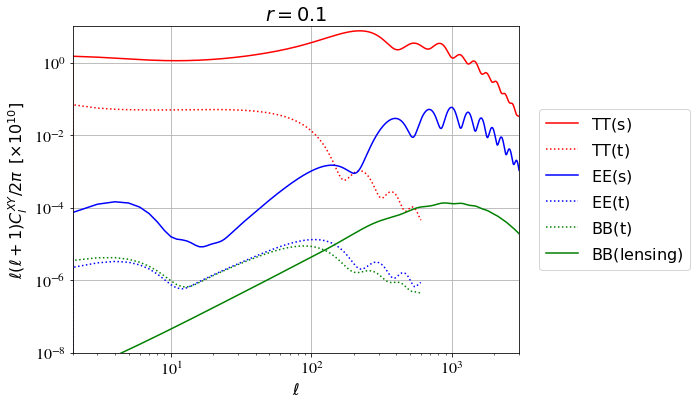

In [3]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246}
                   # other output and precision parameters
                   #'l_max_scalars':3000}
###############
#    
# call CLASS 
#
###############
#
# scalars only
#
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M.compute()
cls = M.raw_cl(3000)
M.struct_cleanup()
M.empty()
#
# tensors only
#
M = Class()
M.set(common_settings)
l_max_tensors = 600
M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,'l_max_tensors':l_max_tensors})
# for l_max=600 we can keep default precision
# for l_max = 3000 we would need to import many high precision settings from the file cl_ref.pre
#M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,'l_max_tensors':3000})
#M.set({
#'recfast_Nz0':100000,
#'tol_thermo_integration':1.e-5,
#'recfast_x_He0_trigger_delta':0.01,
#'recfast_x_H0_trigger_delta':0.01,
#'evolver':0,
#'k_min_tau0':0.002,
#'k_max_tau0_over_l_max':3.,
#'k_step_sub':0.015,
#'k_step_super':0.0001,
#'k_step_super_reduction':0.1,
#'start_small_k_at_tau_c_over_tau_h':0.0004,
#'start_large_k_at_tau_h_over_tau_k':0.05,
#'tight_coupling_trigger_tau_c_over_tau_h':0.005,
#'tight_coupling_trigger_tau_c_over_tau_k':0.008,
#'start_sources_at_tau_c_over_tau_h':0.006,
#'l_max_g':50,
#'l_max_pol_g':25,
#'l_max_ur':50,
#'tol_perturb_integration':1.e-6,
#'perturb_sampling_stepsize':0.01,
#'radiation_streaming_approximation':2,
#'radiation_streaming_trigger_tau_over_tau_k':240.,
#'radiation_streaming_trigger_tau_c_over_tau':100.,
#'ur_fluid_approximation':2,
#'ur_fluid_trigger_tau_over_tau_k':50.,
#'l_logstep':1.026,
#'l_linstep':25,
#'hyper_sampling_flat':12.,
#'hyper_nu_sampling_step':10.,
#'hyper_phi_min_abs':1.e-10,
#'hyper_x_tol':1.e-4,
#'hyper_flat_approximation_nu':1.e6,
#'q_linstep':0.20,
#'q_logstep_spline':20.,
#'q_logstep_trapzd':0.5,
#'q_numstep_transition':250,
#'transfer_neglect_delta_k_T_t2':100.,
#'transfer_neglect_delta_k_T_e':100.,
#'transfer_neglect_delta_k_T_b':100.,
#'neglect_CMB_sources_below_visibility':1.e-30,
#'transfer_neglect_late_source':3000.
#})
M.compute()
clt = M.raw_cl(l_max_tensors)
M.struct_cleanup()
M.empty()
#
# scalars + tensors (only in this case we can get the correct lensed ClBB)
#
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','r':0.1,'n_s':0.9619,'n_t':0,'l_max_scalars':3000,'l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.struct_cleanup()
M.empty()
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,3000])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()
#
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
factort = 1.e10*ellt*(ellt+1.)/2./math.pi
#
plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ellt,factort*clt['tt'],'r:',label=r'$\mathrm{TT(t)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
plt.loglog(ellt,factort*clt['ee'],'b:',label=r'$\mathrm{EE(t)}$')
plt.loglog(ellt,factort*clt['bb'],'g:',label=r'$\mathrm{BB(t)}$')
plt.loglog(ell,factor*(cl_lensed['bb']-cl_tot['bb']),'g-',label=r'$\mathrm{BB(lensing)}$')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))